<a href="https://colab.research.google.com/github/PrabishaPradeep/Dsa/blob/main/prabisha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA PREPROCESSING**

first, import necessary libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the Titanic dataset into python environment

In [44]:
titanic = pd.read_csv ('/content/titanic_dataset.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Make ‘PassengerId’ as the index column

In [45]:
titanic.set_index('PassengerId',inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3. Check the basic details of the dataset

In [46]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


4. Fill in all the missing values present in all the columns in the dataset

In [47]:
titanic.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

there are 177 missing values in age column,687 missing values in cabin column and 2 in embarked.
let us plot the data first.

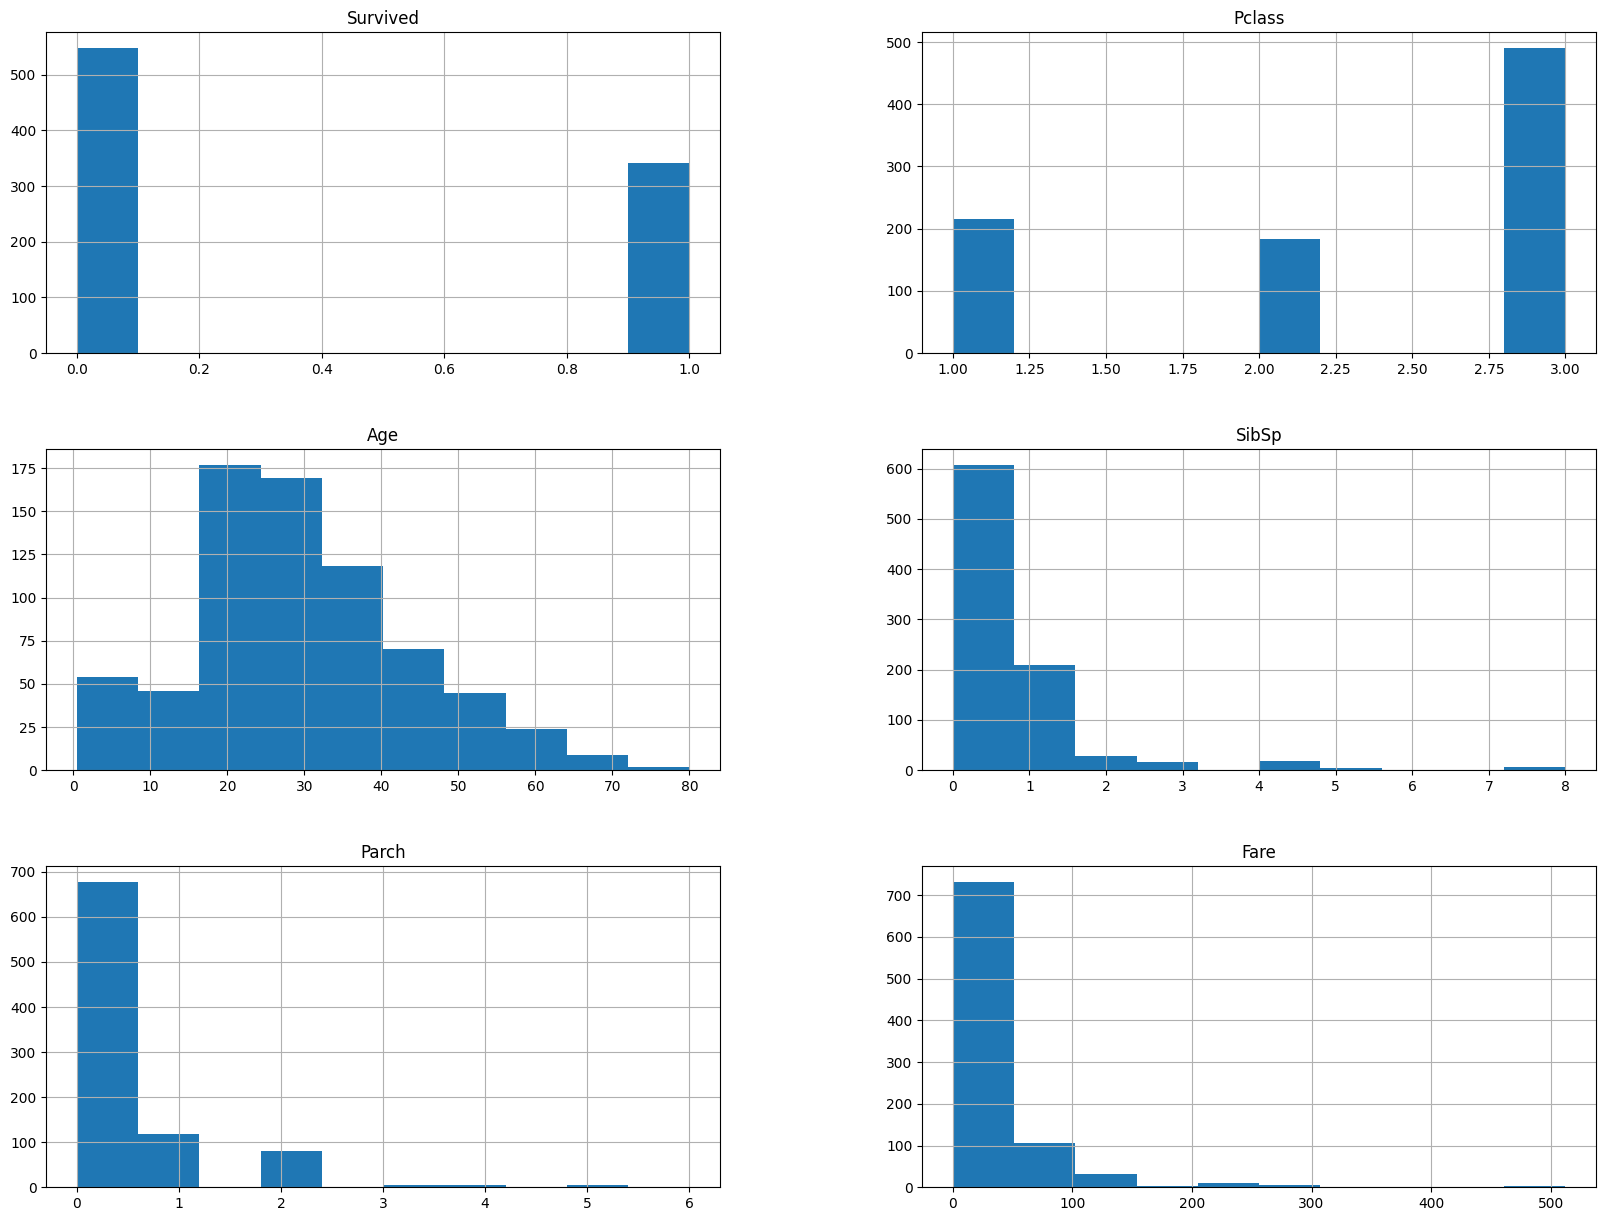

In [48]:
titanic.hist(figsize=(20,15))
plt.show()

In [49]:
titanic['Age'].skew()

0.38910778230082704

since the skewness of age data is between -0.5 and +0.5,distribution of age data is slightly symmetric and skewwd we can fill age column using median

In [50]:
titanic['Age']=titanic['Age'].fillna(titanic['Age'].median())

In [51]:
for i in ['Cabin','Embarked']:
  titanic[i]=titanic[i].fillna(titanic[i].mode()[0])

since the cabin and embarked column are categorical we can fill NA in these columns using mode.

In [52]:
titanic.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

5. Check and  handle outliers in at least 3 columns in the dataset

In [74]:
titanic.SibSp.skew()

3.6953517271630565

In [75]:
titanic.Parch.skew()

2.7491170471010933

In [76]:
titanic.Fare.skew()

1.082178592000912

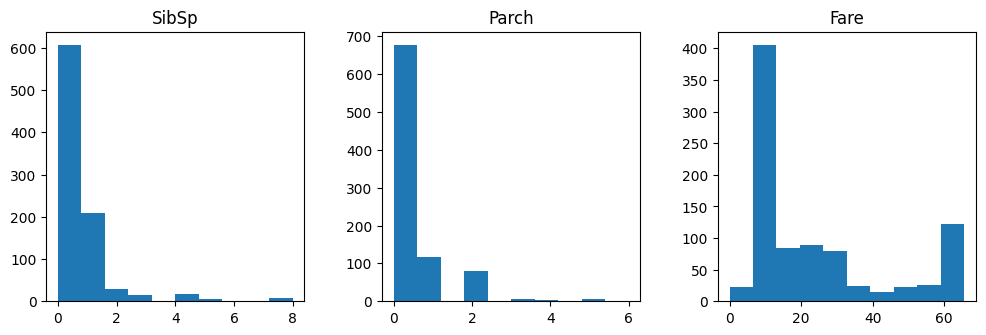

In [78]:
plt.subplot(1,3,1)
plt.hist(titanic.SibSp)
plt.title('SibSp')
plt.subplot(1,3,2)
plt.hist(titanic.Parch)
plt.title('Parch')
plt.subplot(1,3,3)
plt.hist(titanic.Fare)
plt.title('Fare')
plt.gcf().set_figheight(3.5)
plt.gcf().set_figwidth(12)
plt.subplots_adjust(wspace=.3)
plt.show()

In [81]:
for i in ['SibSp','Parch','Fare']:
    Q1=np.percentile(titanic[i],25,method='midpoint')
    Q2=np.percentile(titanic[i],50,method='midpoint')
    Q3=np.percentile(titanic[i],75,method='midpoint')
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    outliers=[]
    for j in titanic[i]:
        if ((j < low_lim) | (j > up_lim)):
            outliers.append(j)
    titanic[i]=titanic[i].clip(lower=low_lim,upper=up_lim)

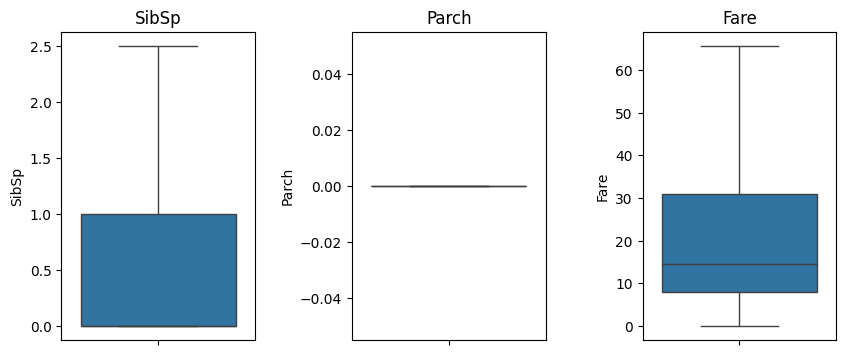

In [84]:
plt.subplot(1,3,1)
sns.boxplot(y=titanic.SibSp)
plt.title('SibSp')
plt.subplot(1,3,2)
sns.boxplot(y=titanic.Parch)
plt.title('Parch')
plt.subplot(1,3,3)
sns.boxplot(y=titanic.Fare)
plt.title('Fare')
plt.gcf().set_figheight(4)
plt.gcf().set_figwidth(10)
plt.subplots_adjust(wspace=.5)
plt.show()

6. Do min max scaling on the feature set (Take ‘Survived’ as target)


In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
minmax=MinMaxScaler()
X=titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
X_mm=minmax.fit_transform(X)
X_mm=pd.DataFrame(X_mm)

In [87]:
X_mm.describe()

,0,1,2,3,4
count,891.000000,891.000000,891.000000,891.0,891.000000
mean,0.654321,0.510371,0.170595,0.0,0.366375
std,0.418036,0.232155,0.283298,0.0,0.312056
min,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.500000,0.375000,0.000000,0.0,0.120522
50%,1.000000,0.490385,0.000000,0.0,0.220223
75%,1.000000,0.625000,0.400000,0.0,0.472313
max,1.000000,1.000000,1.000000,0.0,1.000000
